# Transfer learning by using the VTID2 dataset

---

### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, utils
from tensorflow import keras
from matplotlib import pyplot as plt

import sys
sys.path.insert(0, '../helpers/')
from plot_graphs import plot_loss, plot_acc

### Setting batch and image size, and importing the datasets 

#### Main dataset - Zenodo

In [3]:
IMAGE_SIZE = 100
BATCH_SIZE = 32

train_zenodo = utils.image_dataset_from_directory("../datasets/data/split/Zenodo/train", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)
val_zenodo = utils.image_dataset_from_directory("../datasets/data/split/Zenodo/val", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)
test_zenodo = utils.image_dataset_from_directory("../datasets/data/split/Zenodo/test", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)

train_zenodo = train_zenodo.prefetch(buffer_size=tf.data.AUTOTUNE).cache()
val_zenodo = val_zenodo.prefetch(buffer_size=tf.data.AUTOTUNE).cache()
test_zenodo = test_zenodo.prefetch(buffer_size=tf.data.AUTOTUNE).cache()

Found 3840 files belonging to 6 classes.
Found 480 files belonging to 6 classes.
Found 480 files belonging to 6 classes.


#### Secondary dataset - VTID2

In [3]:
train_vtid2 = utils.image_dataset_from_directory("../datasets/data/split/VTID2/train", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)
val_vtid2 = utils.image_dataset_from_directory("../datasets/data/split/VTID2/val", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)
test_vtid2 = utils.image_dataset_from_directory("../datasets/data/split/VTID2/test", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)

train_vtid2 = train_vtid2.prefetch(buffer_size=tf.data.AUTOTUNE).cache()
val_vtid2 = val_vtid2.prefetch(buffer_size=tf.data.AUTOTUNE).cache()
test_vtid2 = test_vtid2.prefetch(buffer_size=tf.data.AUTOTUNE).cache()

Found 3484 files belonging to 5 classes.
Found 435 files belonging to 5 classes.
Found 437 files belonging to 5 classes.


## 1. Creating a model for the VTID2 dataset

> This is the model architecture for the best model from notebook 3_tuning_model_parameters with all default hyperparameters, but ran for the VTID2 dataset which has five classes. 

In [4]:
inputs = keras.Input(shape=(100, 100, 3))
x = inputs
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(5, activation='softmax')(x)

model_5_vtid2 = keras.Model(inputs, outputs)

model_5_vtid2.compile(optimizer=keras.optimizers.RMSprop(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_5_vtid2.summary()

callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=10
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="../models/5_vtid2.h5",
        monitor="val_accuracy",
        save_best_only=True
    )
]

history_5_vtid2 = model_5_vtid2.fit(
  train_vtid2,
  epochs=40,
  callbacks=callbacks_list,
  validation_data=val_vtid2
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                             

2022-08-31 06:30:43.205057: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-31 06:30:43.205180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


109/109 [==============================] - ETA: 0s - loss: 1.5706 - accuracy: 0.3028

2022-08-31 06:30:54.281066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


109/109 [==============================] - 12s 101ms/step - loss: 1.5706 - accuracy: 0.3028 - val_loss: 1.3660 - val_accuracy: 0.4437
Epoch 2/40
109/109 [==============================] - 10s 93ms/step - loss: 1.2815 - accuracy: 0.4727 - val_loss: 1.0774 - val_accuracy: 0.5494
Epoch 3/40
109/109 [==============================] - 10s 92ms/step - loss: 0.9870 - accuracy: 0.6180 - val_loss: 1.0698 - val_accuracy: 0.6046
Epoch 4/40
109/109 [==============================] - 10s 92ms/step - loss: 0.7319 - accuracy: 0.7196 - val_loss: 0.6532 - val_accuracy: 0.7586
Epoch 5/40
109/109 [==============================] - 10s 92ms/step - loss: 0.5559 - accuracy: 0.7945 - val_loss: 0.5822 - val_accuracy: 0.7908
Epoch 6/40
109/109 [==============================] - 10s 94ms/step - loss: 0.3973 - accuracy: 0.8611 - val_loss: 0.5008 - val_accuracy: 0.8299
Epoch 7/40
109/109 [==============================] - 10s 95ms/step - loss: 0.2820 - accuracy: 0.9024 - val_loss: 0.3885 - val_accuracy: 0.8667
Ep

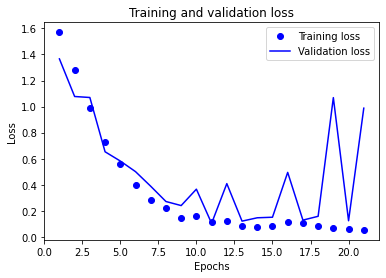

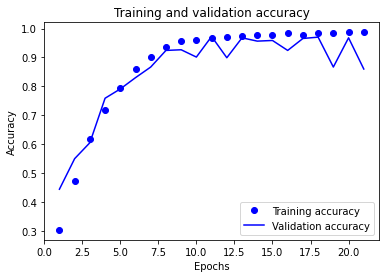

In [5]:
plot_loss(history_5_vtid2)
plot_acc(history_5_vtid2)

### Evaluating test accuracy on the VTID2 dataset

In [6]:
load_vtid2 = keras.models.load_model("../models/5_vtid2.h5")
load_vtid2.evaluate(test_vtid2)

2022-08-31 06:34:23.419280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 40ms/step - loss: 0.0914 - accuracy: 0.9748


[0.09135134518146515, 0.9748284220695496]

> This model worked extremely well for the VTID2 dataset with a test accuracy of 97.60%.

---

*Test Accuracy*: **97.60%**

---

## 2. Partially trained model

> Importing the trained VTID2 model shown in the section above, and training it from the 4th Conv2D layer onwards for the Zenodo dataset.

In [7]:
vtid2 = keras.models.load_model('../models/5_vtid2.h5')
vtid2.layers
vtid2.trainable = False

for layer in vtid2.layers[6:]:
  layer.trainable = True

x = vtid2.layers[-2].output
outputs = layers.Dense(6, activation='softmax', name='classifier')(x)
model_partially_trained = keras.Model(vtid2.inputs, outputs)
model_partially_trained.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_partially_trained.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                           

In [8]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=10
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="../models/5_partially_trainable.h5",
        monitor="val_accuracy",
        save_best_only=True
    )
]

history_partially_trained = model_partially_trained.fit(
  train_zenodo,
  epochs=50,
  callbacks=callbacks_list,
  validation_data=val_zenodo
)

Epoch 1/50


2022-08-31 06:34:25.095753: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - ETA: 0s - loss: 1.0369 - accuracy: 0.6128

2022-08-31 06:34:33.322686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - 9s 69ms/step - loss: 1.0369 - accuracy: 0.6128 - val_loss: 0.5861 - val_accuracy: 0.7771
Epoch 2/50
120/120 [==============================] - 8s 67ms/step - loss: 0.4884 - accuracy: 0.8284 - val_loss: 0.4233 - val_accuracy: 0.8417
Epoch 3/50
120/120 [==============================] - 8s 66ms/step - loss: 0.2971 - accuracy: 0.8977 - val_loss: 0.3374 - val_accuracy: 0.8854
Epoch 4/50
120/120 [==============================] - 8s 66ms/step - loss: 0.1993 - accuracy: 0.9339 - val_loss: 0.2918 - val_accuracy: 0.9104
Epoch 5/50
120/120 [==============================] - 8s 67ms/step - loss: 0.1449 - accuracy: 0.9539 - val_loss: 0.3287 - val_accuracy: 0.9167
Epoch 6/50
120/120 [==============================] - 8s 67ms/step - loss: 0.1426 - accuracy: 0.9560 - val_loss: 0.3224 - val_accuracy: 0.9021
Epoch 7/50
120/120 [==============================] - 8s 67ms/step - loss: 0.0908 - accuracy: 0.9706 - val_loss: 0.2919 - val_accuracy: 0.9104
Epoch 8/50

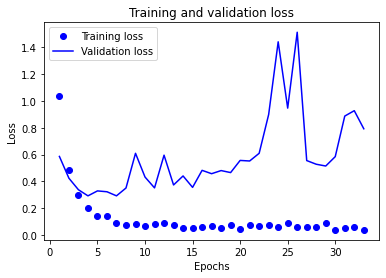

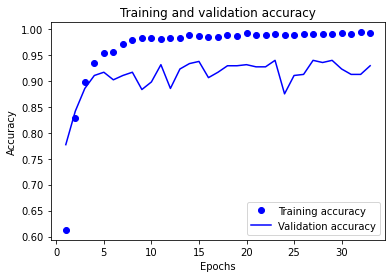

In [9]:
plot_loss(history_partially_trained)
plot_acc(history_partially_trained)

### Evaluating test accuracy on the partially trainable model

In [10]:
load_partially_trainable = keras.models.load_model("../models/5_partially_trainable.h5")
load_partially_trainable.evaluate(test_zenodo)

2022-08-31 06:38:59.200587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 1s 34ms/step - loss: 1.3669 - accuracy: 0.9125


[1.3669360876083374, 0.9125000238418579]

> This gives a test accuracy of 91.25% which definitely does not beat the best model for the Zenodo dataset. 

---

*Test Accuracy*: **91.25%**

---

## 3. All Trainable

> In this model, we again use the trained VTID2 model from section 1 of this notebook, but this time, set all layer to trainable and train it on the Zenodo dataset.

In [11]:
vtid2 = keras.models.load_model('../models/5_vtid2.h5')

x = vtid2.layers[-2].output
outputs = keras.layers.Dense(6, activation='softmax', name='classifier')(x)
all_trainable = keras.Model(vtid2.inputs, outputs)
all_trainable.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
all_trainable.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                           

In [12]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=10
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="../models/5_all_trainable.h5",
        monitor="val_accuracy",
        save_best_only=True
    )
]

history_all_trainable = all_trainable.fit(
  train_zenodo,
  epochs=50,
  callbacks=callbacks_list,
  validation_data=val_zenodo
)

Epoch 1/50


2022-08-31 06:39:00.621141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - ETA: 0s - loss: 1.1481 - accuracy: 0.5664

2022-08-31 06:39:13.758465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - 14s 109ms/step - loss: 1.1481 - accuracy: 0.5664 - val_loss: 0.5334 - val_accuracy: 0.8125
Epoch 2/50
120/120 [==============================] - 13s 111ms/step - loss: 0.5261 - accuracy: 0.8109 - val_loss: 0.3523 - val_accuracy: 0.8729
Epoch 3/50
120/120 [==============================] - 13s 111ms/step - loss: 0.3333 - accuracy: 0.8828 - val_loss: 0.2940 - val_accuracy: 0.9104
Epoch 4/50
120/120 [==============================] - 13s 111ms/step - loss: 0.2259 - accuracy: 0.9214 - val_loss: 0.2994 - val_accuracy: 0.9021
Epoch 5/50
120/120 [==============================] - 13s 108ms/step - loss: 0.1748 - accuracy: 0.9422 - val_loss: 0.2834 - val_accuracy: 0.9083
Epoch 6/50
120/120 [==============================] - 13s 111ms/step - loss: 0.1312 - accuracy: 0.9617 - val_loss: 0.2071 - val_accuracy: 0.9375
Epoch 7/50
120/120 [==============================] - 13s 110ms/step - loss: 0.1146 - accuracy: 0.9654 - val_loss: 0.3813 - val_accuracy: 0.9

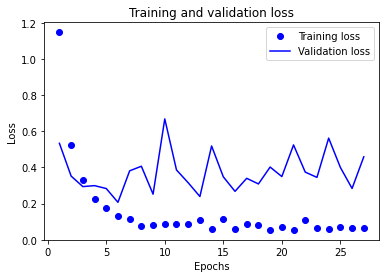

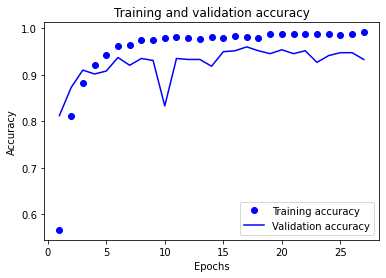

In [13]:
plot_loss(history_all_trainable)
plot_acc(history_all_trainable)

### Evaluating test accuracy on the all trainable model

In [14]:
all_trainable_model = keras.models.load_model("../models/5_all_trainable.h5")
all_trainable_model.evaluate(test_zenodo)

2022-08-31 06:45:14.719432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 1s 33ms/step - loss: 0.5147 - accuracy: 0.9333


[0.5147273540496826, 0.9333333969116211]

> This model gives a test accuracy of 93.33% which is excellent, and comes very close to the best accuracy of Zenodo model. But the fact remains that despite using transfer learning, it does not beat the best accuracy of the best Zenodo model.

---

*Test Accuracy*: **93.33%**

---